After tt

In [1]:
import pandas as pd
import numpy 
dataset_e1= pd.read_csv("./stand_norm_e1.txt",delimiter=" ",header=None)
dataset_e1=numpy.array(dataset_e1,float)

X_e1 = dataset_e1[:,:8]
#m=np.max(X_e1)

print(X_e1.shape)



(13762, 8)


In [2]:
dataset_e2= pd.read_csv("./stand_norm_e2.txt",delimiter=" ",header=None)
dataset_e2=numpy.array(dataset_e2,float)

X_e2 = dataset_e2[:,:8]
#n=np.max(X_e2)
#X_e2=X_e2/n
print(X_e2.shape)


(13762, 8)


In [3]:
x_train_test=numpy.zeros((X_e1.shape[0],X_e1.shape[1],2))
x_train_test[:,:,0]=X_e1
x_train_test[:,:,1]=X_e2
print(x_train_test.shape)
#print(x_test.shape)



(13762, 8, 2)


In [4]:
dataset_output= pd.read_csv("./y2_e1.txt",delimiter=" ",header=None)
dataset_output=numpy.array(dataset_output,float)
dataset_output_new= dataset_output.reshape(dataset_output.shape[0], )


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_test, dataset_output_new, test_size=0.15, random_state=42)
x_train_new=x_train
x_test_new=x_test
print(x_train_new.shape)
print(y_train.shape)
import tensorflow
Y_train_new = tensorflow.keras.utils.to_categorical( y_train)
Y_test_new = tensorflow.keras.utils.to_categorical(y_test)
print(Y_train_new.shape)
print (x_train_new.shape)
x_train_new=x_train_new.reshape(x_train_new.shape[0],  x_train_new.shape[1]*2, )
x_test_new = x_test_new.reshape(x_test_new.shape[0], x_test_new.shape[1]*2, )
print (x_train_new.shape)





(11697, 8, 2)
(11697,)
(11697, 3)
(11697, 8, 2)
(11697, 16)


In [6]:
from sklearn import preprocessing
r_scaler = preprocessing.RobustScaler()
x_train_new= r_scaler.fit_transform(x_train_new)

In [7]:
#Y_train_new= r_scaler.fit_transform(Y_train_new)
x_test_new = r_scaler.fit_transform(x_test_new )


In [8]:


import numpy as np 
import pandas as pd 

from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D , Dropout ,BatchNormalization ,GRU ,Bidirectional
from keras.layers import Flatten
from keras.layers import Dense
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from keras.layers import LSTM


In [9]:
model = Sequential()
model.add(LSTM(1024,return_sequences=True,input_shape=(16,1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(1024, activation='relu'))) #elu
model.add(Dropout(0.5))
#model.add(Bidirectional(LSTM(500, dropout=0.5)))
model.add(BatchNormalization(momentum=0.6))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary()) 

2022-03-15 18:39:49.657151: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 18:39:49.688224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 18:39:49.688387: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 18:39:49.688761: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16, 1024)          4202496   
                                                                 
 dropout (Dropout)           (None, 16, 1024)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 2048)             16785408  
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0

In [10]:
checkpointer = ModelCheckpoint(filepath='./'+'_best_weights.h5', verbose=1, monitor='val_loss', mode='auto', save_best_only=True) #save at each epoch if the validation decreased

history =model.fit(x_train_new, Y_train_new, epochs=70, batch_size=512, verbose=1, validation_split=0.2, callbacks=[checkpointer])

model.save('weights_BiLSTM2.h5')

Epoch 1/70


2022-03-15 18:39:56.274011: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302


19/19 [==============================] - ETA: 0s - loss: 0.5163 - accuracy: 0.6374
Epoch 1: val_loss improved from inf to 0.46111, saving model to ./_best_weights.h5
19/19 [==============================] - 17s 735ms/step - loss: 0.5163 - accuracy: 0.6374 - val_loss: 0.4611 - val_accuracy: 0.7201
Epoch 2/70
19/19 [==============================] - ETA: 0s - loss: 0.4145 - accuracy: 0.7173
Epoch 2: val_loss improved from 0.46111 to 0.37195, saving model to ./_best_weights.h5
19/19 [==============================] - 16s 844ms/step - loss: 0.4145 - accuracy: 0.7173 - val_loss: 0.3720 - val_accuracy: 0.7342
Epoch 3/70
19/19 [==============================] - ETA: 0s - loss: 0.3903 - accuracy: 0.7287
Epoch 3: val_loss improved from 0.37195 to 0.36198, saving model to ./_best_weights.h5
19/19 [==============================] - 16s 857ms/step - loss: 0.3903 - accuracy: 0.7287 - val_loss: 0.3620 - val_accuracy: 0.7466
Epoch 4/70
19/19 [==============================] - ETA: 0s - loss: 0.3765 -

In [11]:
score = model.evaluate(x_test_new, Y_test_new, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

65/65 [==============================] - 2s 23ms/step - loss: 0.2340 - accuracy: 0.8625
Test loss: 0.23395375907421112
Test accuracy: 0.8624697327613831


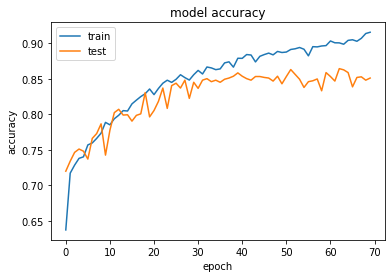

In [12]:
import matplotlib.pyplot as plt # shorcut for a plot function
plt.plot(history.history['accuracy']) # training accuracy
plt.plot(history.history['val_accuracy']) # validation accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

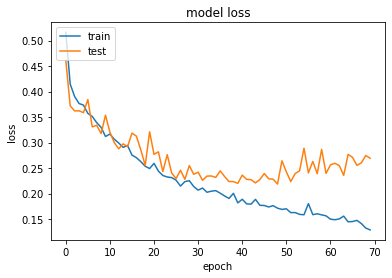

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
predictions = model.predict(x_test_new, batch_size=32, verbose=2)
print ("predicted images size :",predictions.shape)
print(predictions)
print(Y_test_new.shape)

65/65 - 2s - 2s/epoch - 28ms/step
predicted images size : (2065, 3)
[[1.0000000e+00 1.5966032e-11 2.0418256e-15]
 [9.9999976e-01 1.2203348e-07 7.1138345e-08]
 [9.9899441e-01 1.0055499e-03 2.7880001e-08]
 ...
 [1.0000000e+00 6.0022273e-13 1.6418112e-15]
 [7.1463234e-07 9.9999928e-01 2.6357494e-10]
 [1.0000000e+00 1.6782862e-14 5.6581604e-19]]
(2065, 3)


In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((predictions.shape[0]))
y_test = np.empty((predictions.shape[0]))
for i in range(predictions.shape[0]):
    
    y_pred[i]=np.argmax(predictions[i])
    y_test[i]=np.argmax(Y_test_new[i])
#print(y_pred)
    
       
confusion = confusion_matrix(y_test,  y_pred)
print (confusion)


Confusion matrix:  Custom threshold (for positive) of 0.5
[[871 108   1]
 [171 883   2]
 [  1   1  27]]


In [16]:
print("The accuracy score on this random test-set is  :", accuracy_score(y_test,  y_pred) )
recall=recall_score(y_test,  y_pred, average=None)
av_recall=sum(recall)/3
print("recall",recall, "the avreage recall is ",av_recall)
precision=precision_score(y_test,  y_pred,average=None)
av_precision=sum(precision)/3

print("precision",precision,"the avreage precision is ",av_precision)

F1_score=(2*av_precision*av_recall)/(av_precision+av_recall)
print("F1_score",F1_score)

The accuracy score on this random test-set is  : 0.8624697336561743
recall [0.88877551 0.83617424 0.93103448] the avreage recall is  0.8853280784623149
precision [0.83509108 0.89012097 0.9       ] the avreage precision is  0.8750706837183889
F1_score 0.8801694974784132
